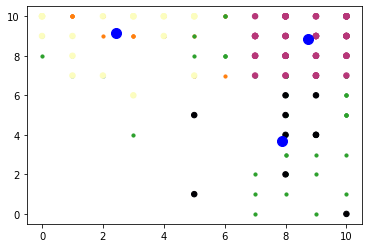

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline




B = ["the-conjuring","aquaman","the-hangover","joker","spider-man","evil-dead-2013"]
#순서대로 공포->히어로 , 코미디->사회고발 , 코미디->로드무비 , 히어로->공포

En_score = list() #전체 리뷰점수 리스트

score_review = list()


for j in range(6):
    for i in range(1):

        url = "https://www.metacritic.com/movie/"+B[j]+"/user-reviews?page=" +str(i)
        headers = {'User-Agent': 'Mozilla/5.0'}

        html = requests.get(url,headers=headers) ##requests 를 이용해서 url의 html 파일을 가져옴
        soup = BeautifulSoup(html.text, "html.parser") ##가져온 html 파일을 html parser를 통해서 정리

        score_review = list()
        html_score_review = soup.findAll("div", attrs={"metascore_w user large movie negative indiv","metascore_w user large movie mixed indiv","metascore_w user large movie positive indiv","metascore_w user large movie positive indiv perfect"})

        for line in html_score_review:
            text = line.get_text()
            score_review.append(text)
  
        score_review.append(score_review)
    En_score.append(score_review)



data = pd.DataFrame(En_score)
data.to_csv('userscore.csv')



for i in range(6):
        for j in range(100):
            En_score[i][j] = int(En_score[i][j])



score1=pd.DataFrame(columns=('the-conjuring','aquaman'))
score2=pd.DataFrame(columns=('the-hangover','joker'))
score3=pd.DataFrame(columns=('spider-man','evil-dead-2013'))



for i in range(100):
    score1.loc[i]=[En_score[0][i],En_score[1][i]]
    score2.loc[i]=[En_score[2][i],En_score[3][i]]
    score3.loc[i]=[En_score[4][i],En_score[5][i]]
#score(1,2,3중 하나 입력시 데이터 확인).head(100)



kmeans1=KMeans(n_clusters=3).fit(score1)
centers1=kmeans1.cluster_centers_
y_kmeans1=kmeans1.predict(score1)
plt.scatter(score1.iloc[:,0],score1.iloc[:,1],s=10)



kmeans2=KMeans(n_clusters=3).fit(score2)
centers2=kmeans2.cluster_centers_
y_kmeans2=kmeans2.predict(score2)
plt.scatter(score2.iloc[:,0],score2.iloc[:,1],s=10)



kmeans3=KMeans(n_clusters=3).fit(score3)
centers3=kmeans3.cluster_centers_
y_kmeans3=kmeans3.predict(score3)
plt.scatter(score3.iloc[:,0],score3.iloc[:,1],s=10)



plt.scatter(score1.iloc[:,0],score1.iloc[:,1],c=y_kmeans1,s=30,cmap='magma')
plt.scatter(centers1[:,0],centers1[:,1],c='blue',s=100,alpha=1.0)


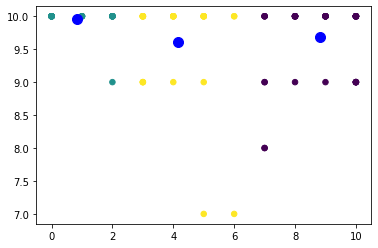

In [2]:



plt.scatter(score2.iloc[:,0],score2.iloc[:,1],c=y_kmeans2,s=30,cmap='viridis')
plt.scatter(centers2[:,0],centers2[:,1],c='blue',s=100,alpha=1.0)

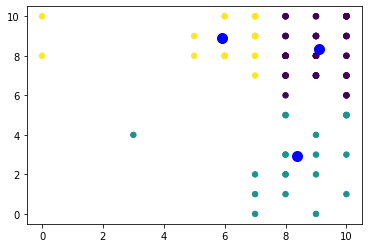

In [3]:




plt.scatter(score3.iloc[:,0],score3.iloc[:,1],c=y_kmeans3,s=30,cmap='viridis')
plt.scatter(centers3[:,0],centers3[:,1],c='blue',s=100,alpha=1.0)